<div>
    <h1 align="center"> <b>Training Model on GTSRB</b></h1>
</div>

## ***Import Libraries***

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

## ***The Dataset Path***

In [46]:
dataset_path = 'D:/traffic_signs_recognition/dataset'
train_path = os.path.join(dataset_path,'Train')

## ***Total Classes and Class Names***

In [47]:
NUM_CLASSES = len(os.listdir(train_path))
print(NUM_CLASSES)
classes = {
            0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'
}

43


## ***Dataset Visualization***

c:\users\farhad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


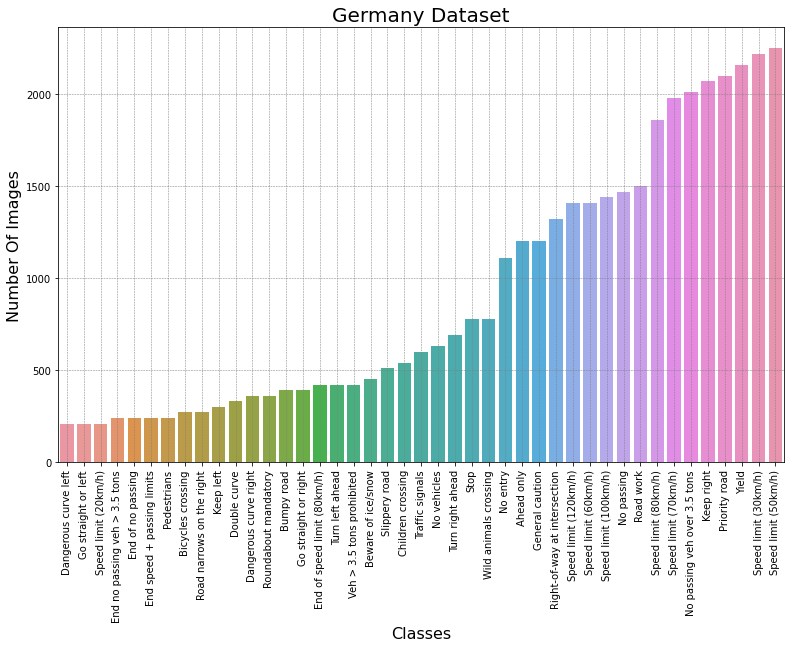

In [4]:
def visualize_dataset(path,class_dic,label):
    folders = os.listdir(path)
    classes_number = []
    classes_image_number = []
    for folder in folders:
        class_path = os.path.join(path,str(folder))
        count = len(os.listdir(class_path))
        classes_image_number.append(count)
        classes_number.append(class_dic[int(folder)])

    zipped = zip(classes_image_number,classes_number)
    result = sorted(zipped)
    tuples = zip(*result)
    classes_image_number,classes_number = [list(tuple) for tuple in  tuples]

    plt.figure(figsize=(13,8))
    sns.barplot(classes_number, classes_image_number)
    plt.xticks(rotation=90)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.xlabel("Classes", fontsize = 16)
    plt.ylabel("Number Of Images", fontsize = 16)
    plt.title(label, fontsize = 20)
    plt.show();
    
    
visualize_dataset(train_path,classes,'Germany Dataset')

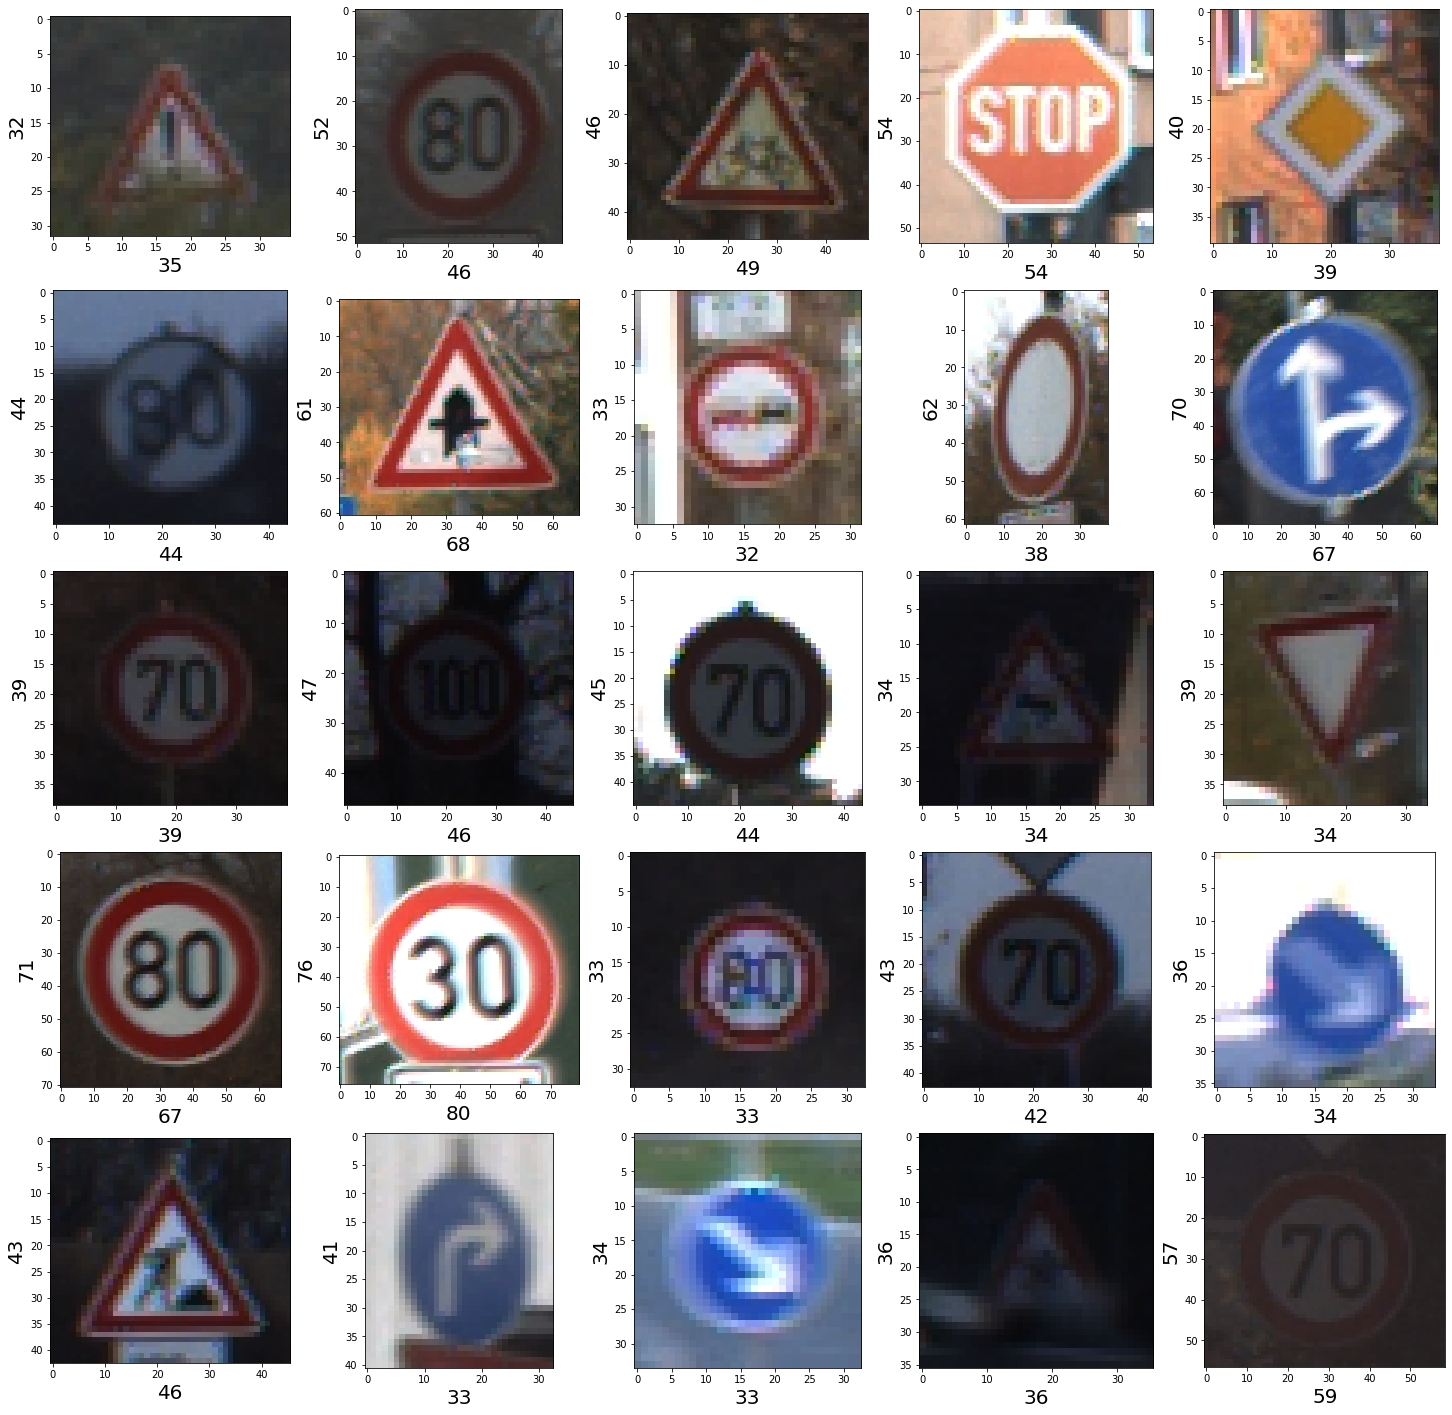

In [6]:
import random
from matplotlib.image import imread

def print_test_rand(dataset_path,file_name,ptsd=False):
    test_df = pd.read_csv(dataset_path + '/' + file_name)
    imgs = test_df["Path"].values

    plt.figure(figsize=(25,25))

    for i in range(1,26):
        plt.subplot(5,5,i)
        if ptsd:
            random_img_path = dataset_path + '/test/PTSD_' + random.choice(imgs)
        else:
            random_img_path = dataset_path + '/' + random.choice(imgs)
        rand_img = imread(random_img_path)
        plt.imshow(rand_img)
        plt.grid(b=False)
        plt.xlabel(rand_img.shape[1], fontsize = 20)
        plt.ylabel(rand_img.shape[0], fontsize = 20)

print_test_rand(dataset_path,'Test.csv')

## ***Store Data,Labels In The List***

In [5]:
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

## ***Collecting Data***

In [6]:
def collecting_data(num_classes, path, img_height, img_width, counter_per_class=None):
    data=[]
    labels=[]
    for i in range(num_classes):
        count = 0
        path_temp = os.path.join(path,str(i))
        images = os.listdir(path_temp)
        images = list(set(images))
        for j in images:
            if(count == counter_per_class):
                break
            try:
                img = Image.open(path_temp + '/' + j)
                img = img.resize((img_height,img_width))
                img = np.array(img)
                data.append(img)
                labels.append(i)
            except Exception as e:
                print(e)
            count+=1
    return data,labels

data , labels = collecting_data(NUM_CLASSES,train_path,IMG_HEIGHT,IMG_WIDTH,240)

In [7]:
print(len(data))
print(len(labels))

10230
10230


## ***Converting List to Numpy Array***

In [8]:
data = np.array(data)
labels = np.array(labels)
a,b = np.unique(labels, return_counts = True)
print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[210 240 240 240 240 240 240 240 240 240 240 240 240 240 240 240 240 240
 240 210 240 240 240 240 240 240 240 240 240 240 240 240 240 240 240 240
 240 210 240 240 240 240 240]


## ***Spliting to Train and Validation Set***

In [9]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)

In [10]:
x_train = x_train/255 
x_val = x_val/255

In [11]:
print("x_train shape is : {}".format(x_train.shape))
print("y_train shape is : {}".format(y_train.shape))
print("x_val shape is : {}".format(x_val.shape))
print("y_val shape is : {}".format(y_val.shape))

x_train shape is : (8184, 30, 30, 3)
y_train shape is : (8184,)
x_val shape is : (2046, 30, 30, 3)
y_val shape is : (2046,)


In [12]:
a , b=np.unique(y_train,return_counts=True)
print("train_labels is : {}".format(a))
print("number of labels is : {}".format(b))

train_labels is : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
number of labels is : [171 182 186 186 191 195 190 187 199 191 194 200 182 195 188 200 186 193
 189 172 190 183 197 194 192 188 195 186 196 196 194 187 190 185 194 195
 199 171 200 192 195 194 194]


## ***One Hot Encoding***

In [13]:
def to_one_hot(labels, dimension=NUM_CLASSES):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results

In [14]:
y_train = to_one_hot(y_train, NUM_CLASSES)
y_val = to_one_hot(y_val, NUM_CLASSES)

In [15]:
print("train_labels shape is : {}".format(y_train.shape))
print("validation_labels shape is : {}".format(y_val.shape))

train_labels shape is : (8184, 43)
validation_labels shape is : (2046, 43)


## ***Save Train and Validation Set***

In [31]:
def save_tvs_np(path,x_train,x_val,y_train,y_val):
    try:
        os.mkdir(path)
        np.save(path + '/x_train',x_train)
        np.save(path + '/x_val',x_val)
        np.save(path + '/y_train',y_train)
        np.save(path + '/y_val',y_val)
    except Exception as e:
        print(e)
        
path = os.path.join(dataset_path,'train_valid_numpy')
save_tvs_np(path,x_train,x_val,y_train,y_val)

[WinError 183] Cannot create a file when that file already exists: 'D:/traffic_signs_recognition/dataset\\train_valid_numpy'


## ***Load Train and Validation Set***

In [16]:
def load_tvs_np(path):
    x_train = np.load(path + '/x_train.npy')
    x_val = np.load(path + '/x_val.npy')
    y_train = np.load(path + '/y_train.npy')
    y_val = np.load(path + '/y_val.npy')
    return x_train,x_val,y_train,y_val
    
path = os.path.join(dataset_path,'train_valid_numpy')
x_train, x_val, y_train, y_val = load_tvs_np(path)

In [17]:
print("x_train shape is : {}".format(x_train.shape))
print("y_train shape is : {}".format(y_train.shape))
print("x_val shape is : {}".format(x_val.shape))
print("y_val shape is : {}".format(y_val.shape))

x_train shape is : (8184, 30, 30, 3)
y_train shape is : (8184, 43)
x_val shape is : (2046, 30, 30, 3)
y_val shape is : (2046, 43)


## ***Model Architecture***

In [35]:
def create_cnn_model():
    model = keras.models.Sequential()
    
    # Conv Block 1
    model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape = x_train.shape[1:]))
    model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.BatchNormalization(axis=-1))
    
    # Conv Block 2
    model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.BatchNormalization(axis=-1))
    
    # Classifier
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(rate = 0.5))
    model.add(keras.layers.Dense(43, activation='softmax'))
    
    return model

model = create_cnn_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

In [36]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='my_best_training_model on GTSRB.h5',
        monitor='val_loss',
        save_best_only=True,
    ),
    keras.callbacks.CSVLogger(
        'my_best_training_model on GTSRB.log',
        separator=',',
        append=False
    )
]

In [37]:
epochs = 20
optimizer = keras.optimizers.Adam(learning_rate = 0.001, decay = 0.001 / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
 history = model.fit(x_train, y_train, batch_size=32, epochs = epochs, callbacks=callbacks_list, validation_data=(x_val, y_val))

Epoch 1/20
256/256 [==============================] - 46s 121ms/step - loss: 1.1455 - accuracy: 0.7092 - val_loss: 3.9873 - val_accuracy: 0.1984
Epoch 2/20
256/256 [==============================] - 28s 108ms/step - loss: 0.1152 - accuracy: 0.9676 - val_loss: 0.7979 - val_accuracy: 0.7317
Epoch 3/20
256/256 [==============================] - 28s 108ms/step - loss: 0.0373 - accuracy: 0.9912 - val_loss: 0.0474 - val_accuracy: 0.9853
Epoch 4/20
256/256 [==============================] - 28s 109ms/step - loss: 0.0243 - accuracy: 0.9944 - val_loss: 0.0724 - val_accuracy: 0.9770
Epoch 5/20
256/256 [==============================] - 28s 109ms/step - loss: 0.0253 - accuracy: 0.9930 - val_loss: 0.0300 - val_accuracy: 0.9927
Epoch 6/20
256/256 [==============================] - 28s 109ms/step - loss: 0.0173 - accuracy: 0.9957 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 7/20
256/256 [==============================] - 28s 108ms/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.0582 - val_ac

In [39]:
log_data = pd.read_csv('my_best_training_model on GTSRB.log', sep=',', engine='python')
log_data

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.709189,1.145529,0.198436,3.987322
1,1,0.967620,0.115175,0.731672,0.797942
2,2,0.991202,0.037335,0.985337,0.047379
3,3,0.994379,0.024271,0.977028,0.072371
4,4,0.993035,0.025260,0.992669,0.029961
5,5,0.995723,0.017279,0.988270,0.039392
6,6,0.997312,0.011393,0.980938,0.058187
7,7,0.997556,0.009734,0.986804,0.045106
8,8,0.997312,0.011599,0.991202,0.027010
9,9,0.995723,0.015222,0.986315,0.055822


## ***Load Model***

In [41]:
from keras.models import load_model
model = load_model('my_best_training_model on GTSRB.h5')

## ***Plot Results***

In [ ]:
acc = log_data['accuracy']
val_acc = log_data['val_accuracy']
loss = log_data['loss']
val_loss = log_data['val_loss']
epochs = log_data['epoch']

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


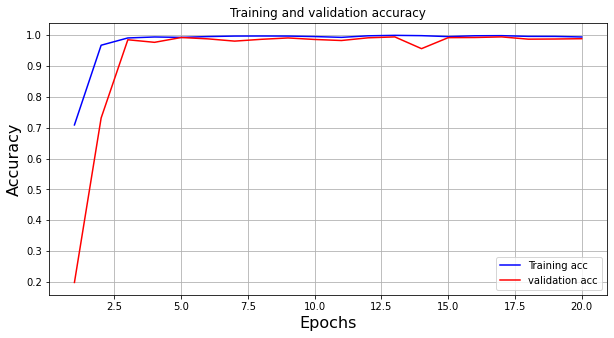

In [41]:
plt.figure(figsize=(10,5))
plt.plot(epochs, acc, 'b', label = 'Training acc' )
plt.plot(epochs, val_acc, 'r', label = 'validation acc' )
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title('Training and validation accuracy')
plt.grid()
plt.legend();

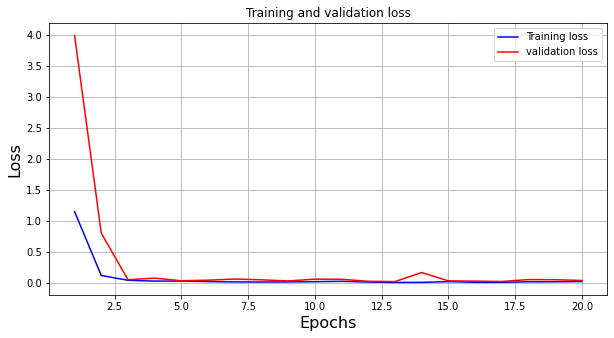

In [42]:
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'b', label = 'Training loss' )
plt.plot(epochs, val_loss, 'r', label = 'validation loss' )
plt.xlabel("Epochs", fontsize = 16)
plt.ylabel("Loss", fontsize = 16)
plt.title('Training and validation loss')
plt.grid()
plt.legend();

## ***Testing on test data***

In [ ]:
test_df = pd.read_csv(dataset_path + '/Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [58]:
def collecting_test_data(path, path_df, img_height, img_width, test_size=2046, ptsd = False):
    test_df = pd.read_csv(path_df)
    if isinstance(test_size,float):
        test_size = round(test_size * len(test_df))
    indices = test_df.index.tolist()
    test_indices = random.sample(population = indices, k=test_size)
    test_df = test_df.loc[test_indices]
    y_test = test_df['ClassId']
    test_imgs = test_df['Path']
    x_test = []
    for i in test_imgs:
        try:
            if (ptsd):
                img = Image.open(path + '/test/PTSD_' + i)
            else:
                img = Image.open(path + '/' + i)
            img = img.resize(((img_height,img_width)))
            x_test.append(np.array(img))
        except Exception as e:
            print(e)
    return x_test,y_test

random.seed(42)
path_df = os.path.join(dataset_path,'Test.csv')
x_test , y_test = collecting_test_data(dataset_path,path_df,IMG_HEIGHT,IMG_WIDTH)

## ***PreProcess***

In [59]:
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test / 255
y_test = to_one_hot(y_test, NUM_CLASSES)

In [60]:
print("x_test shape is : {}".format(x_test.shape))
print("y_test shape is : {}".format(y_test.shape))

x_test shape is : (2046, 30, 30, 3)
y_test shape is : (2046, 43)


## ***Save Test Set***

In [52]:
def save_test_np(path,x_test,y_test):
    try:
        os.mkdir(path)
        np.save(path + '/x_test',x_test)
        np.save(path + '/y_test',y_test)
    except Exception as e:
        print(e)

path = os.path.join(dataset_path,'test_numpy')
save_test_np(path,x_test,y_test)

## ***Load Test Set***

In [42]:
def load_test_np(path):
    x_test = np.load(path + '/x_test.npy')
    y_test = np.load(path + '/y_test.npy')
    return x_test,y_test

path = os.path.join(dataset_path,'test_numpy')
x_test,y_test = load_test_np(path)

## ***Accuracy***

In [67]:
model.evaluate(x_test, y_test, batch_size = 256)

8/8 [==============================] - 2s 205ms/step - loss: 0.1166 - accuracy: 0.9756


[0.11655023694038391, 0.9755620956420898]

In [43]:
y_test = np.argmax(y_test, axis=1)
y_test

array([16,  1, 38, ...,  1,  3,  0], dtype=int64)

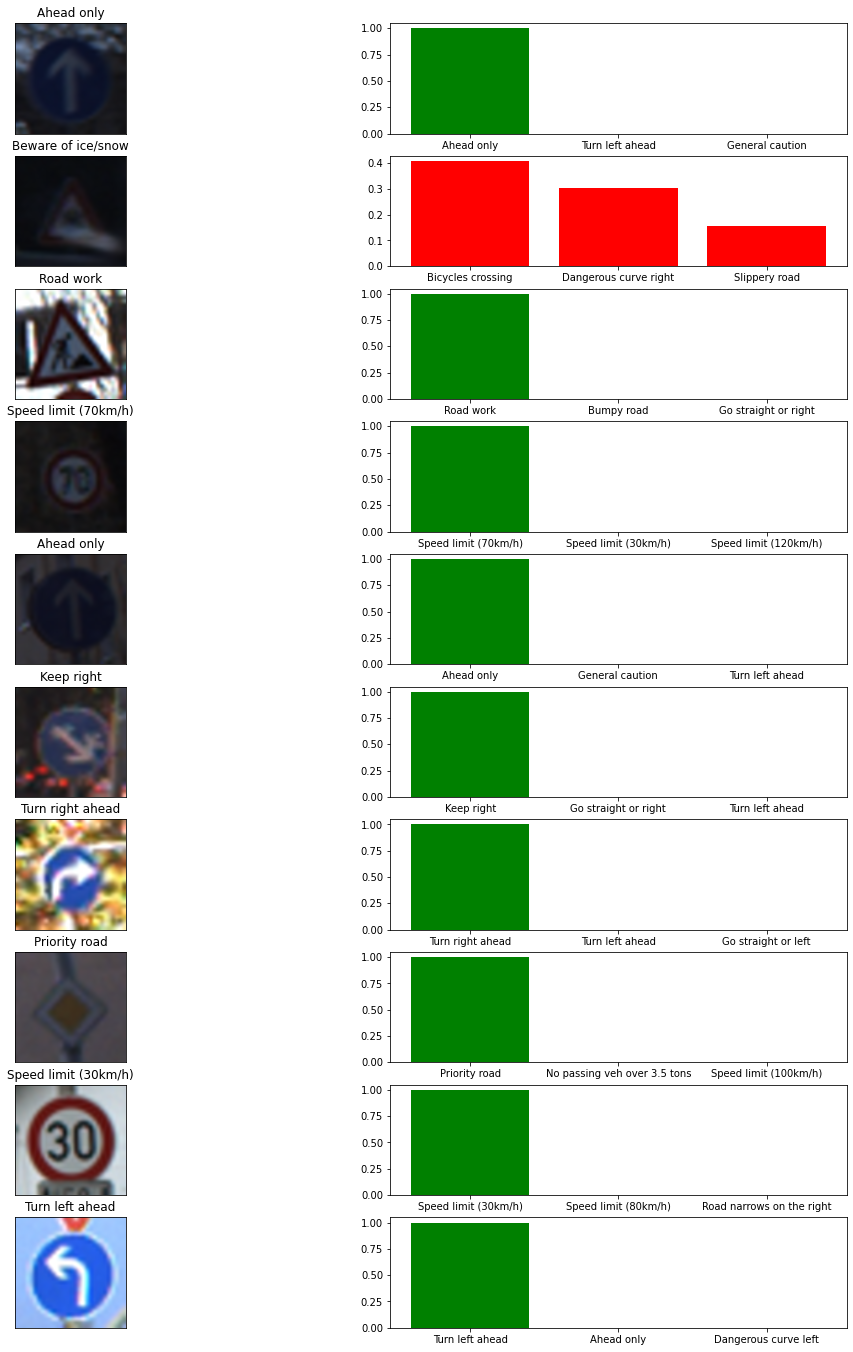

In [49]:
def print_predict_model(model,x_test,y_test,classes_dic):
    plt.figure(figsize=(18, 24))
    idx = np.random.choice(len(x_test), 10, replace=False)
    p = model.predict(x_test[idx])

    for i in range(len(idx)):
        plt.subplot(10, 2, 2*i+1)
        plt.imshow(x_test[idx[i]], interpolation='spline16')
        plt.title(classes_dic[y_test[idx[i]]])
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        pred_label = np.argsort(-p[i])[:3]
        pred_prob = [p[i][l] for l in pred_label]
        pred_label = [classes_dic[l] for l in pred_label]
        color=[]
        for label in pred_label:
            if(classes_dic[y_test[idx[i]]] == label):
                color.append('green')
            color.append('red')
        plt.subplot(10, 2, 2*i+2)
        plt.bar(range(3), pred_prob, color = color)
        plt.xticks(range(3), pred_label)
    plt.show()
    
print_predict_model(model,x_test,y_test,classes)